In [1]:
from all_formulas import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ParameterGrid

In [2]:
## endpoint

def calc_V_endpoint(b, a, T, q, m):
    V = np.exp((b*(q**m)-a)*T)
    return(V)

def calc_Y_endpoint(b, a, T, q, m, n):
    Y = np.exp((b*(q**m)-a)*T) - np.exp((b*(q**(m+n))-a)*T)
    return(Y)

def calc_ERF_endpoint(b, a, T, q0, q1, m, n):
    num = np.exp((b*(q1**m)-a)*T) - np.exp((b*(q1**(m+n))-a)*T)
    den = np.exp((b*(q0**m)-a)*T) - np.exp((b*(q0**(m+n))-a)*T)
    return(num/den)

def calc_IRF_endpoint(b, a, T, q0, q1, m):
    num = np.exp((b*(q1**m)-a)*T)
    den = np.exp((b*(q0**m)-a)*T)
    return(num/den)


## cumulative

def calc_V_cumul(b, a, T, q, m):
    V = np.exp((b*(q**m)-a)*T)/(b*(q**m)-a)
    return(V)

def calc_Y_cumul(b, a, T, q, m, n):
    Y = np.exp((b*(q**m)-a)*T)/(b*(q**m)-a) - np.exp((b*(q**(m+n))-a)*T)/(b*(q**(m+n))-a)
    return(Y)

def calc_ERF_cumul(b, a, T, q0, q1, m, n):
    num = calc_Y_cumul(b, a, T, q1, m, n)
    den = calc_Y_cumul(b, a, T, q0, m, n)
    return(num/den)

def calc_IRF_cumul(b, a, T, q0, q1, m):
    num = calc_V_cumul(b, a, T, q1, m)
    den = calc_V_cumul(b, a, T, q0, m)
    return(num/den)

In [3]:
bvals = [7.61]
avals = [5]

param_dict = {'b':bvals, 'a':avals}
param_grid = list(ParameterGrid(param_dict))

In [4]:
b = 7.61
a = 3
T = 5
q0 = 1-1e-6
q1 = 1-3e-6
m = 20000
n = 1

u_vals = np.logspace(-6,-4,1000)
mvals = [10000,20000]

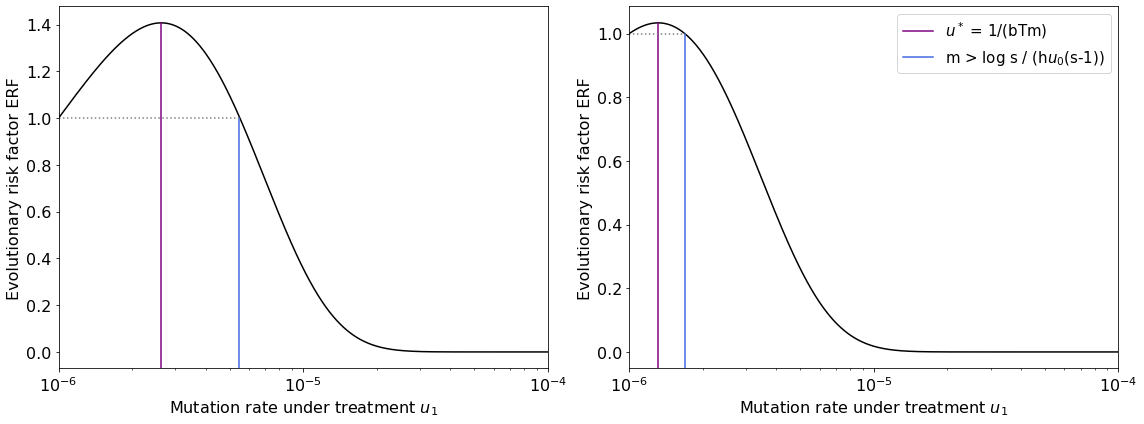

In [6]:
fig, ax = plt.subplots(1,2,figsize = (16,6))

for i in range(2):

    condition_full = 1+np.log(u_vals/1e-6)/(b*T*1e-6*mvals[i]) - (u_vals/1e-6)
    limit_u_full = u_vals[np.searchsorted(-condition_full,0)]
    
    condition_ustar = 1/(b*T*mvals[i])

    ax[i].plot(u_vals, calc_ERF_endpoint(b, a, T, q0, 1-u_vals, mvals[i], n), c='k',label='_nolegend_')
    
    ### calculate maxima for vertical lines
    ylim_coor = ax[i].get_ylim()
    plotted = calc_ERF_endpoint(b, a, T, q0, 1-u_vals, mvals[i], n)
    
    ax[i].axvline(condition_ustar, ymax = (np.max(plotted)-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='purple')    
    ax[i].axvline(limit_u_full, ymax = (plotted[0]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='royalblue')

    
    ### calculate bounds for horizontal line
    ax[i].set_xlim(1e-6,1e-4)
    xlim_coor = ax[i].get_xlim()
    ax[i].axhline(1, c='grey', xmin = (1e-6-xlim_coor[0])/(xlim_coor[1]-xlim_coor[0]), 
                  xmax = (np.log10(limit_u_full)-np.log10(xlim_coor[0]))/(np.log10(xlim_coor[1])-np.log10(xlim_coor[0])), 
                  linestyle = 'dotted',label='_nolegend_')
    
    
    
    ax[i].set_xscale('log')
    ax[i].tick_params(labelsize = 16)
    ax[i].set_xlabel('Mutation rate under treatment $u_1$', fontsize = 16)
    ax[i].set_ylabel('Evolutionary risk factor ERF', fontsize = 16)
    

ax[1].legend(['$u^*$ = 1/(bTm)', 'm > log s / (h$u_0$(s-1))'], fontsize = 15)
    
plt.tight_layout()
plt.savefig('agreement_logs_formula.jpg', dpi = 400, bbox_inches = 'tight')

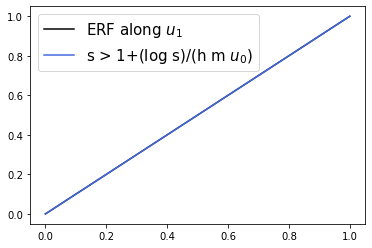

In [38]:
plt.plot(np.arange(2), np.arange(2), c='k')
plt.plot(np.arange(2), np.arange(2), c='royalblue')
plt.legend(['ERF along $u_1$', 's > 1+(log s)/(h m $u_0$)'], fontsize = 15)
plt.savefig('legend_agreement_logformula.jpg', dpi = 400, bbox_inches = 'tight')